# Higher Diploma in Science in Computing (Data Analytics)  

**University**: [Atlantic Technological University (ATU)](https://www.atu.ie/)  
**Module:** Computer Infrastructure  
**Lecturer:** [Ian McLoughlin](https://github.com/ianmcloughlin)  
**Author:** [Elaine R. Cazetta](https://github.com/elainecazetta)  

---

# Project: FAANG Stock Data Analysis with yfinance  
This notebook demonstrates how to download, store, and visualize [FAANG](https://www.investopedia.com/terms/f/faang-stocks.asp) stock data using Python and the yfinance package. It also shows how to structure a reusable function and automate plotting for further analysis.

---

## 🔹Problem 1 – Data from yfinance

---

### - Requirements:

Using the [yfinance](https://github.com/ranaroussi/yfinance) Python package, write a function called `get_data()` that downloads all hourly data for the previous five days for the five FAANG stocks:

- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)

The function should save the data into a folder called `data` in the root of your repository using a filename with the format `YYYYMMDD-HHmmss.csv` where `YYYYMMDD` is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. `09` for September), followed by the two digit day, and `HHmmss` is hour, minutes, seconds.
Create the `data` folder if you don't already have one.

---

### - Overview of the Solution:  

The following steps show how to import the necessary libraries, download hourly FAANG stock data for the past five days using the yfinance package, and save it to a timestamped CSV file inside the `data` folder.

In [1]:
# Import libraries

# Data Frames
import pandas as pd

# Yahoo Finance data
import yfinance as yf

# Dates and Times
import datetime as dt

# Plotting
import matplotlib.pyplot as plt

# Files and folders
import os

Exploring the yfinance package. Official documentation available [here](https://ranaroussi.github.io/yfinance/).

In [2]:
# List of FAANG tickers
tickers = yf.Tickers('META AAPL AMZN NFLX GOOG')

In [3]:
# Download FAANG stocks data and assign it to a dataframe:
df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')
df.head(3) # show the first 3 rows

/tmp/ipykernel_13221/1249406616.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')
[*********************100%***********************]  5 of 5 completed


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-10 14:30:00+00:00  277.450012  231.735001  318.739990  651.317505   
2025-12-10 15:30:00+00:00  278.257690  231.660004  318.600006  652.849182   
2025-12-10 16:30:00+00:00  278.526489  230.720001  317.075104  650.250000   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
Datetime                                                                   
2025-12-10 14:30:00+00:00  95.525002  278.792999  232.419998  319.519989   
2025-12-10 15:30:00+00:00  94.949997  278.279999  232.020004  318.859589   
2025-12-10 16:30:00+00:00  94.790001  278.890015  232.110001  318.825012   

Price                                             ...        Open              \
Ticker                           META       NFLX  ...        AAPL        AMZN   
Datetime                                          ...                           
2025-12-10 14:30:00+00:00  654.510010  96.959999  ...  277.869995  228.589996   
2025-12-10 15:30:00+00:00  652.950012  95.567802  ...  277.454987  231.735001   
2025-12-10 16:30:00+00:00  653.311523  95.059998  ...  278.230011  231.639999   

Price                                                          Volume  \
Ticker                           GOOG        META       NFLX     AAPL   
Datetime                                                                
2025-12-10 14:30:00+00:00  316.619995  650.400024  96.735001  3868165   
2025-12-10 15:30:00+00:00  318.700012  651.039978  95.519997  1880040   
2025-12-10 16:30:00+00:00  318.570007  652.830017  94.955002  1611918   

Price                                                          
Ticker                        AMZN     GOOG     META     NFLX  
Datetime                                                       
2025-12-10 14:30:00+00:00  7146039  2497344  1971573  8028921  
2025-12-10 15:30:00+00:00  2842036   887438  1226649  6148312  
2025-12-10 16:30:00+00:00  1702459   900377   638304  3158059  

[3 rows x 25 columns]

### - The `Data` Directory:  
This step uses Python’s built-in `os` module to create a folder named `data`. This directory will store the CSV files downloaded from Yahoo Finance. The `os.makedirs()` function is used with the `exist_ok=True` argument to ensure the folder is created if it doesn’t already exist, avoiding any errors if it’s run multiple times.

In [4]:
# Import the os module and create 'data' folder if it doesn't exist
# Reference: https://docs.python.org/3/library/os.html
# Reference: OpenAI
import os

os.makedirs("data", exist_ok=True)

### - Dates and Times:   
To create unique filenames, a timestamp is generated using Python’s `datetime` module [(reference: official documentation)](https://docs.python.org/3/library/datetime.html). This guarantees that each dataset is saved with a distinctive and descriptive name.

In [5]:
# Get the current date and time using the datetime module
now = dt.datetime.now()

# Display the current date and time
now

datetime.datetime(2025, 12, 16, 22, 50, 39, 862514)

In [6]:
# Format the current date and time as a string: YYYYMMDD-HHmmss
# This format will be used in the filename
# Reference: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
now.strftime("%Y%m%d-%H%M%S")

'20251216-225039'

In [7]:
# Create a unique filename that includes the timestamp
# The file will be saved inside the 'data' folder as a CSV file
filename = "data/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S") + ".csv"
print(filename)

data/20251216-225039.csv


In [8]:
# Save the downloaded dataframe (df) to the CSV file
# This will store the FAANG stock data in the 'data' folder
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
df.to_csv(filename)

### - Complete Function: `get_data()`    

Below is the final version of the `get_data()` function that combines all the steps demonstrated earlier. This function downloads hourly stock data for the five FAANG companies for the previous five days, creates a timestamped filename using the `datetime` module, saves the dataset as a CSV file inside the `data` folder, and ensures that the folder exists before saving.

In [9]:
# Script of the `get_data()` function:

def get_data():
    # References: 
    # https://www.w3schools.com/python/python_functions.asp
    # https://docs.python.org/3/tutorial/controlflow.html#defining-functions
    # https://www.w3schools.com/python/python_functions.asp
    # https://www.geeksforgeeks.org/python/python-def-keyword/
    # OpenAI
    """
    Downloads hourly stock data for the previous five days 
    for the FAANG companies and saves it as a timestamped CSV file.
    """
    
    # Import libraries inside the function
    import yfinance as yf
    import datetime as dt
    import os
  
    # Download hourly data for the last 5 days of FAANG tickers
    df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')

    # Create 'data' folder if it doesn't exist
    # Ref: https://docs.python.org/3/library/os.html
    # Ref: OpenAI
    os.makedirs("data", exist_ok=True)

    # Generate filename with timestamp
    filename = "data/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S") + ".csv"

    # Save data to CSV
    df.to_csv(filename)

    # Print confirmation message
    print(f"Data saved to {filename}")

    # Return the downloaded DataFrame
    return df

# Example usage
df = get_data()
df.head(3)

/tmp/ipykernel_13221/1329689539.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')
[*********************100%***********************]  5 of 5 completed

Data saved to data/20251216-225040.csv


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-10 14:30:00+00:00  277.450012  231.735001  318.739990  651.317505   
2025-12-10 15:30:00+00:00  278.257690  231.660004  318.600006  652.849182   
2025-12-10 16:30:00+00:00  278.526489  230.720001  317.075104  650.250000   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
Datetime                                                                   
2025-12-10 14:30:00+00:00  95.525002  278.792999  232.419998  319.519989   
2025-12-10 15:30:00+00:00  94.949997  278.279999  232.020004  318.859589   
2025-12-10 16:30:00+00:00  94.790001  278.890015  232.110001  318.825012   

Price                                             ...        Open              \
Ticker                           META       NFLX  ...        AAPL        AMZN   
Datetime                                          ...                           
2025-12-10 14:30:00+00:00  654.510010  96.959999  ...  277.869995  228.589996   
2025-12-10 15:30:00+00:00  652.950012  95.567802  ...  277.454987  231.735001   
2025-12-10 16:30:00+00:00  653.311523  95.059998  ...  278.230011  231.639999   

Price                                                          Volume  \
Ticker                           GOOG        META       NFLX     AAPL   
Datetime                                                                
2025-12-10 14:30:00+00:00  316.619995  650.400024  96.735001  3868165   
2025-12-10 15:30:00+00:00  318.700012  651.039978  95.519997  1880040   
2025-12-10 16:30:00+00:00  318.570007  652.830017  94.955002  1611918   

Price                                                          
Ticker                        AMZN     GOOG     META     NFLX  
Datetime                                                       
2025-12-10 14:30:00+00:00  7146039  2497344  1971573  8028921  
2025-12-10 15:30:00+00:00  2842036   887438  1226649  6148312  
2025-12-10 16:30:00+00:00  1702459   900377   638304  3158059  

[3 rows x 25 columns]

---

## 🔹Problem 2: Plotting Data  

---

### - Requirements:  

Write a function called `plot_data()` that opens the latest data file in the `data` folder and, on one plot, plots the `Close` prices for each of the five stocks.
The plot should include axis labels, a legend, and the date as a title.
The function should save the plot into a `plots` folder in the root of your repository using a filename in the format `YYYYMMDD-HHmmss.png`.
Create the `plots` folder if you don't already have one.

---

### - Finding the Latest CSV File  

To work with the most recent dataset, we retrieve all filenames from the `data` folder using Python’s `os.listdir` function. Since each CSV file is saved with a timestamp in its filename, we simply sort the list in reverse order and select the first entry. This gives the newest file without needing to check creation times.

In [10]:
# List and sort files
# Ref: https://docs.python.org/3/library/os.html#os.listdir
files = os.listdir("data/")

In [11]:
# Sort files in reverse order (newest first)
# Ref: https://docs.python.org/3/library/stdtypes.html#list.sort
files.sort(reverse=True)

In [12]:
# Latest file (newest timestamp)
latest = files[0]

In [13]:
# Get the full path of the latest file
# Ref: https://docs.python.org/3/library/os.path.html#os.path.join
full_path = os.path.join("data", latest)

# Checking the latest file path
print(f"Using latest file: {full_path}")

Using latest file: data/20251216-225040.csv


### - Reading the most recent CSV file into a DataFrame  

Once the latest CSV file has been identified, it is loaded into a pandas DataFrame using the `read_csv` function. The file contains a two-level header, so both header rows are specified when reading the data. The first column is set as the index, and date parsing is enabled to ensure the index is treated as a datetime object. This allows the data to be analysed and manipulated more easily in later steps.  

In [ ]:
# Calling pd.read_csv to read and check the latest CSV file
# Ref: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
df = pd.read_csv(full_path)
df.head(5)

,Price,Close,Close.1,Close.2,Close.3,Close.4,High,High.1,High.2,High.3,...,Open,Open.1,Open.2,Open.3,Open.4,Volume,Volume.1,Volume.2,Volume.3,Volume.4
0,Ticker,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,...,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX
1,Datetime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-12-10 14:30:00+00:00,277.45001220703125,231.73500061035156,318.739990234375,651.3175048828125,95.5250015258789,278.7929992675781,232.4199981689453,319.5199890136719,654.510009765625,...,277.8699951171875,228.58999633789062,316.6199951171875,650.4000244140625,96.73500061035156,3868165,7146039,2497344,1971573,8028921
3,2025-12-10 15:30:00+00:00,278.2576904296875,231.66000366210938,318.6000061035156,652.8491821289062,94.94999694824219,278.2799987792969,232.02000427246094,318.8595886230469,652.9500122070312,...,277.4549865722656,231.73500061035156,318.70001220703125,651.0399780273438,95.5199966430664,1880040,2842036,887438,1226649,6148312
4,2025-12-10 16:30:00+00:00,278.5264892578125,230.72000122070312,317.0751037597656,650.25,94.79000091552734,278.8900146484375,232.11000061035156,318.82501220703125,653.3115234375,...,278.2300109863281,231.63999938964844,318.57000732421875,652.8300170898438,94.95500183105469,1611918,1702459,900377,638304,3158059


The columns and index need to be set correctly while reading the CSV file. Using the following parameters from the `read.csv` function to handle issues:  

- `header=[0, 1]` sets the first two rows of the file as column headers.  

- `index_col=0` sets the first column as the index.

- `parse_dates=True` converts the index to datetime format.


In [ ]:
# Final read_csv with proper parameters 
df = pd.read_csv(full_path, header=[0, 1], index_col=0, parse_dates=True)

# Display the index to verify datetime conversion
df.index

DatetimeIndex(['2025-12-10 14:30:00+00:00', '2025-12-10 15:30:00+00:00',
               '2025-12-10 16:30:00+00:00', '2025-12-10 17:30:00+00:00',
               '2025-12-10 18:30:00+00:00', '2025-12-10 19:30:00+00:00',
               '2025-12-10 20:30:00+00:00', '2025-12-11 14:30:00+00:00',
               '2025-12-11 15:30:00+00:00', '2025-12-11 16:30:00+00:00',
               '2025-12-11 17:30:00+00:00', '2025-12-11 18:30:00+00:00',
               '2025-12-11 19:30:00+00:00', '2025-12-11 20:30:00+00:00',
               '2025-12-12 14:30:00+00:00', '2025-12-12 15:30:00+00:00',
               '2025-12-12 16:30:00+00:00', '2025-12-12 17:30:00+00:00',
               '2025-12-12 18:30:00+00:00', '2025-12-12 19:30:00+00:00',
               '2025-12-12 20:30:00+00:00', '2025-12-15 14:30:00+00:00',
               '2025-12-15 15:30:00+00:00', '2025-12-15 16:30:00+00:00',
               '2025-12-15 17:30:00+00:00', '2025-12-15 18:30:00+00:00',
               '2025-12-15 19:30:00+00:00', '2025-1

In [16]:
# Select only the 'Close' price column
close_df = df['Close']
print(close_df.head(3))

Ticker                           AAPL        AMZN        GOOG        META  \
Datetime                                                                    
2025-12-10 14:30:00+00:00  277.450012  231.735001  318.739990  651.317505   
2025-12-10 15:30:00+00:00  278.257690  231.660004  318.600006  652.849182   
2025-12-10 16:30:00+00:00  278.526489  230.720001  317.075104  650.250000   

Ticker                          NFLX  
Datetime                              
2025-12-10 14:30:00+00:00  95.525002  
2025-12-10 15:30:00+00:00  94.949997  
2025-12-10 16:30:00+00:00  94.790001  


### - Visualizing FAANG Stock Prices  

In this section, we visualize the closing prices (`Close`) for the five FAANG companies using the most recent dataset saved in the `data` folder. The plots below demonstrate how to use pandas’ built-in plotting functions to easily visualize stock price trends.

Finally, we combine these steps into a function called `plot_data()` that automatically opens the latest CSV file, plots all FAANG `Close` prices, and saves the chart as a timestamped `.png` file inside the `plots` folder.  

### - Exploring, Testing and Preparing the Data  

The following commands show how to inspect and plot data directly from the DataFrame before building the complete plotting function.

<Axes: xlabel='Datetime'>

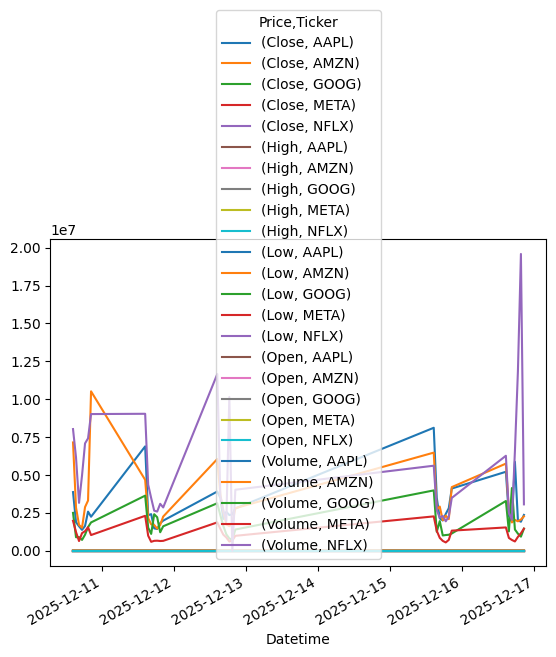

In [17]:
# Call plot() with no arguments for testing
# Ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
df.plot()

In [18]:
# show the columns of the dataframe
# The df has multi-level columns (multi-index)
df.columns 

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

In [19]:
# Show the closing price for Apple for testing
df[('Close', 'AAPL')]

Datetime
2025-12-10 14:30:00+00:00    277.450012
2025-12-10 15:30:00+00:00    278.257690
2025-12-10 16:30:00+00:00    278.526489
2025-12-10 17:30:00+00:00    278.119995
2025-12-10 18:30:00+00:00    278.220001
2025-12-10 19:30:00+00:00    278.980011
2025-12-10 20:30:00+00:00    278.720001
2025-12-11 14:30:00+00:00    276.119995
2025-12-11 15:30:00+00:00    275.825012
2025-12-11 16:30:00+00:00    277.904999
2025-12-11 17:30:00+00:00    277.522614
2025-12-11 18:30:00+00:00    277.760010
2025-12-11 19:30:00+00:00    278.095001
2025-12-11 20:30:00+00:00    278.059998
2025-12-12 14:30:00+00:00    277.869995
2025-12-12 15:30:00+00:00    277.739990
2025-12-12 16:30:00+00:00    277.855011
2025-12-12 17:30:00+00:00    279.049988
2025-12-12 18:30:00+00:00    277.950012
2025-12-12 19:30:00+00:00    278.054993
2025-12-12 20:30:00+00:00    278.369995
2025-12-15 14:30:00+00:00    274.144989
2025-12-15 15:30:00+00:00    275.510010
2025-12-15 16:30:00+00:00    274.920013
2025-12-15 17:30:00+00:00    27

<Axes: xlabel='Datetime'>

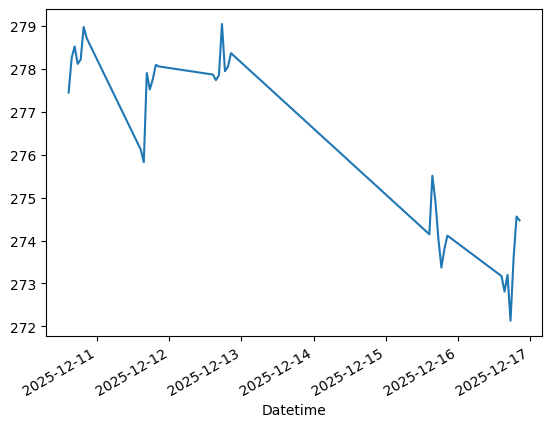

In [20]:
# Plotting the closing price for Apple for testing
df[('Close', 'AAPL')].plot()

<Axes: xlabel='Datetime'>

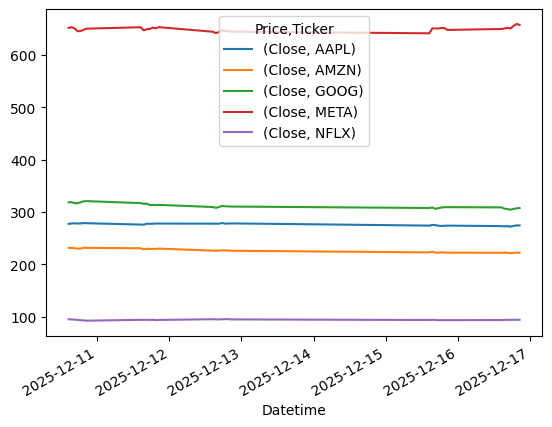

In [21]:
# Closing price for all FAANG stocks
df[[('Close', 'AAPL'), ('Close', 'AMZN'), ('Close', 'GOOG'), ('Close', 'META'), ('Close', 'NFLX')]].plot()

In [22]:
# Simplify accessing the 'Close' prices without hard-coding the stock names
df['Close']
print(df['Close'].head(3))

Ticker                           AAPL        AMZN        GOOG        META  \
Datetime                                                                    
2025-12-10 14:30:00+00:00  277.450012  231.735001  318.739990  651.317505   
2025-12-10 15:30:00+00:00  278.257690  231.660004  318.600006  652.849182   
2025-12-10 16:30:00+00:00  278.526489  230.720001  317.075104  650.250000   

Ticker                          NFLX  
Datetime                              
2025-12-10 14:30:00+00:00  95.525002  
2025-12-10 15:30:00+00:00  94.949997  
2025-12-10 16:30:00+00:00  94.790001  


<Axes: xlabel='Datetime'>

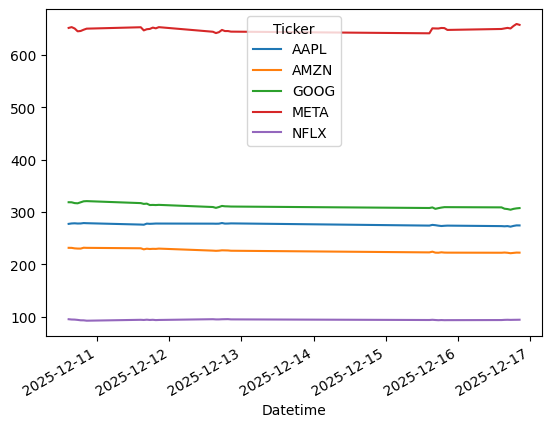

In [23]:
# Plotting the closing prices for all stocks
# Ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
df['Close'].plot()

### - Saving Plots    



TBA

### - Complete Function: `plot_data()`    

Below is the final version of the `plot_data()` function that combines all the steps demonstrated earlier. This function opens the most recent CSV file from the `data` folder, plots the `Close` prices for the five FAANG stocks on a single chart with axis labels, a legend, and the current date as the title. The plot is then saved as a timestamped PNG file in the `plots` folder, and the folder is created automatically if it doesn’t already exist.

Using latest file: data/20251216-225040.csv


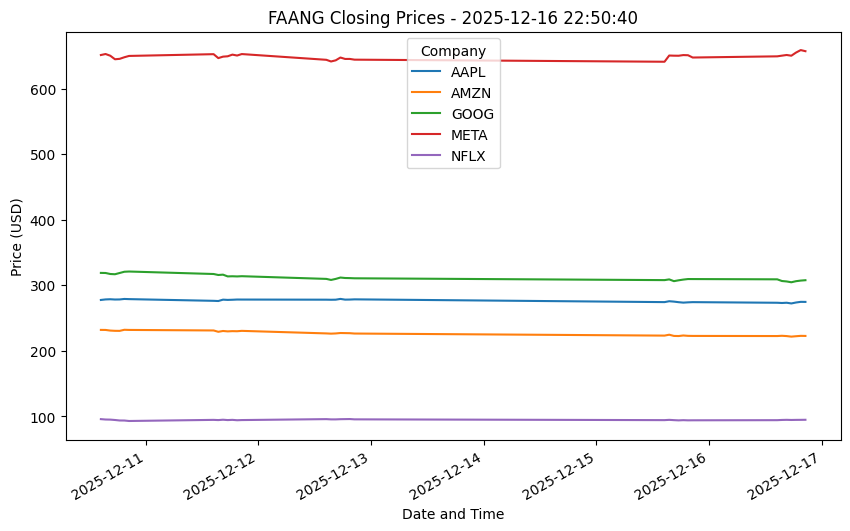

Plot saved as: plots/20251216-225041.png


In [24]:
# Script of the `plot_data()` function
#
# References:
# https://matplotlib.org/stable/gallery/index.html
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
# https://docs.python.org/3/library/os.html
# OpenAI

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import os

def plot_data():
    """
    Opens the latest CSV file in the 'data' folder, plots the 
    closing prices of the FAANG companies, and saves the plot 
    with a timestamped filename in the 'plots' folder.
    """

    # List and sort files
    files = os.listdir("data/")
    files.sort(reverse=True) # Newest file first

    # Latest file (newest timestamp)
    latest = files[0] # Get the latest file
    full_path = os.path.join("data", latest) # Get full path

    print(f"Using latest file: {full_path}")

    # Read the CSV with multi-level columns
    df = pd.read_csv(full_path, header=[0, 1], index_col=0, parse_dates=True)

    # Select only Close prices
    close_df = df["Close"]

    # Title date based on filename
    # Reference: OpenAI
    base = latest.replace(".csv", "")
    title_date = dt.datetime.strptime(base, "%Y%m%d-%H%M%S").strftime("%Y-%m-%d %H:%M:%S")

    # Plot
    close_df.plot(figsize=(10, 6), title=f"FAANG Closing Prices - {title_date}")
    plt.xlabel("Date and Time")
    plt.ylabel("Price (USD)")
    plt.legend(title="Company")

    # Save plot
    plot_filename = f"plots/{dt.datetime.now().strftime('%Y%m%d-%H%M%S')}.png"
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"Plot saved as: {plot_filename}")

# Example usage
plot_data()


---

## 🔹Problem 3: Script  

---

### - Requirements:  

Create a Python script called `faang.py` in the root of your repository.
Copy the above functions into it and it so that whenever someone at the terminal types `./faang.py`, the script runs, downloading the data and creating the plot.
Note that this will require a shebang line and the script to be marked executable.
Explain the steps you took in your notebook.

---

TBA

---

## 🔹Problem 4: Automation  

---

### - Requirements:  

Create a [GitHub Actions workflow](https://docs.github.com/en/actions) to run your script every Saturday morning.
The script should be called `faang.yml` in a `.github/workflows/` folder in the root of your repository.
In your notebook, explain each of the individual lines in your workflow.

---

TBA

---

## End